In [79]:
# Dependencies
import pandas as pd 
import requests
import json
import random
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import seaborn as sns

# Google API Key
from config import gkey

file_path = "Resources/winemag-data_first150k.csv"
data = pd.read_csv("Resources/winemag-data_first150k.csv") 

# Preview the first 50 lines of the loaded data
data.head(50)


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


In [9]:
# Drop columns no needed
data.drop(columns=["Unnamed: 0", "description", "region_2"], inplace=True)

# Remove missing values
data.dropna(inplace=True)

#Order DataFrame Columns
data = data[["designation", "winery", "variety", "region_1", "province", "country", "price", "points"]]
data.head(10)

,designation,winery,variety,region_1,province,country,price,points
0,Martha's Vineyard,Heitz,Cabernet Sauvignon,Napa Valley,California,US,235.0,96
1,Carodorum Selección Especial Reserva,Bodega Carmen Rodríguez,Tinta de Toro,Toro,Northern Spain,Spain,110.0,96
2,Special Selected Late Harvest,Macauley,Sauvignon Blanc,Knights Valley,California,US,90.0,96
3,Reserve,Ponzi,Pinot Noir,Willamette Valley,Oregon,US,65.0,96
4,La Brûlade,Domaine de la Bégude,Provence red blend,Bandol,Provence,France,66.0,95
5,Numanthia,Numanthia,Tinta de Toro,Toro,Northern Spain,Spain,73.0,95
6,San Román,Maurodos,Tinta de Toro,Toro,Northern Spain,Spain,65.0,95
7,Carodorum Único Crianza,Bodega Carmen Rodríguez,Tinta de Toro,Toro,Northern Spain,Spain,110.0,95
8,Silice,Bergström,Pinot Noir,Chehalem Mountains,Oregon,US,65.0,95
9,Gap's Crown Vineyard,Blue Farm,Pinot Noir,Sonoma Coast,California,US,60.0,95


In [10]:
# Sample for project purpose
sample = data.sample(n=10, axis=0, random_state = 4)
sample.reset_index(drop = True, inplace=True)

sample

,designation,winery,variety,region_1,province,country,price,points
0,Thorn,Grant Burge,Riesling,Eden Valley,South Australia,Australia,19.0,88
1,Doganella Il Tintorosso,Tommasi,Red Blend,Maremma,Tuscany,Italy,15.0,87
2,Reserve,Castoro Cellars,Cabernet Sauvignon,Paso Robles,California,US,28.0,87
3,Ellenbach Vineyard,Etude,Pinot Noir,Sonoma Coast,California,US,60.0,90
4,Il Monovitigno,Benanti,Nero d'Avola,Sicilia,Sicily & Sardinia,Italy,30.0,88
5,Centine,Banfi,Rosé,Toscana,Tuscany,Italy,12.0,87
6,Crianza,Finca Antigua,Red Blend,La Mancha,Central Spain,Spain,12.0,85
7,Gypsy,Epiphany,Rhône-style Red Blend,Santa Barbara County,California,US,25.0,90
8,Reserve,Concannon,Syrah,Livermore Valley,California,US,24.0,89
9,Le Vigne,Sandrone,Nebbiolo,Barolo,Piedmont,Italy,118.0,86


In [11]:
sample["latitud"] = ""
sample["longitud"] = ""
sample["elevation"] = ""


# Build URL using the Google Geocoding API
base_url = "https://maps.googleapis.com/maps/api/geocode/json"

# Counter
count = 1

# Iterate dataframe for filling Latitud and Longitud columns
for index, row in sample.iterrows():
    
    # Build winery location search
    winery_loc = row["winery"] + "," + row["region_1"]  + "," +  row["province"]
    
    # Parameters for API request
    params = {"address": winery_loc, "key": gkey}
    
    try:

        # Run request
        response = requests.get(base_url, params=params)

        # Convert to JSON
        geo_data = response.json()

        # Extract lat/lng and fill columns
        sample.loc[index, 'latitud'] = geo_data["results"][0]["geometry"]["location"]["lat"]
        sample.loc[index, 'longitud'] = geo_data["results"][0]["geometry"]["location"]["lng"]
    
        # print Winery location found
        print(f"Processing row {count} Winery location {winery_loc} {sample.loc[index, 'latitud']} {sample.loc[index, 'longitud']} found")
        count += 1
        
    except (KeyError, IndexError):
        print("Winery not found" )
        
#test.head(10)

# Counter
count = 1

# Iterate dataframe for filling Elevation column
for index, row in sample.iterrows():
    lat = row["latitud"]
    lng = row["longitud"]
    
    try:
        # Build URL using the Google Elevation API
        url_ele = f"https://maps.googleapis.com/maps/api/elevation/json?locations={lat},{lng}&key={gkey}"
        
        # Run request
        response = requests.get(url_ele)

        # Convert to JSON
        geo_data = response.json()

        # Extract elevation and fill column
        sample.loc[index, 'elevation'] = geo_data["results"][0]["elevation"]
    
        # print Winery elevation found
        print(f"Processing row {count} Winery elevation {sample.loc[index, 'elevation']} found")
        count += 1
        
    except (KeyError, IndexError):
        print("Elevation not found" )

#test.head(10)

sample.to_csv("Resources/winery_data.csv", index=False)


Processing row 1 Winery location Grant Burge,Eden Valley,South Australia -34.5615916 138.9754373 found
Processing row 2 Winery location Tommasi,Maremma,Tuscany 42.6086111 11.6966667 found
Processing row 3 Winery location Castoro Cellars,Paso Robles,California 35.5772607 -120.722921 found
Processing row 4 Winery location Etude,Sonoma Coast,California 38.2458215 -122.3150228 found
Processing row 5 Winery location Benanti,Sicilia,Sicily & Sardinia 37.5999938 14.0153557 found
Processing row 6 Winery location Banfi,Toscana,Tuscany 42.980621 11.400659 found
Processing row 7 Winery location Finca Antigua,La Mancha,Central Spain 39.6310835 -2.8920419 found
Processing row 8 Winery location Epiphany,Santa Barbara County,California 34.6669689 -120.1147479 found
Processing row 9 Winery location Concannon,Livermore Valley,California 37.666199 -121.7397388 found
Processing row 10 Winery location Sandrone,Barolo,Piedmont 44.6208903 7.954625300000001 found
Processing row1 Winery elevation 323.24249267

In [54]:
sample = pd.read_csv("Resources/winery_data.csv") 
sample.dropna(inplace=True)
print(sample.count())
sample.head()

designation    2912
winery         2912
variety        2912
region_1       2912
province       2912
country        2912
price          2912
points         2912
latitud        2912
longitud       2912
elevation      2912
dtype: int64


,designation,winery,variety,region_1,province,country,price,points,latitud,longitud,elevation
0,Thorn,Grant Burge,Riesling,Eden Valley,South Australia,Australia,19.0,88,-34.561592,138.975437,323.242493
1,Doganella Il Tintorosso,Tommasi,Red Blend,Maremma,Tuscany,Italy,15.0,87,42.608611,11.696667,354.988892
2,Reserve,Castoro Cellars,Cabernet Sauvignon,Paso Robles,California,US,28.0,87,35.577261,-120.722921,280.324707
3,Ellenbach Vineyard,Etude,Pinot Noir,Sonoma Coast,California,US,60.0,90,38.245822,-122.315023,16.873728
4,Il Monovitigno,Benanti,Nero d'Avola,Sicilia,Sicily & Sardinia,Italy,30.0,88,37.599994,14.015356,622.540649


In [55]:
sample.groupby(["variety"]).mean()


,price,points,latitud,longitud,elevation
variety,,,,,
Aglianico,31.00000,88.400000,40.985284,6.350525,396.286303
Albana,21.00000,92.000000,44.596761,11.218640,24.282932
Albariño,21.50000,88.000000,39.427081,-64.740419,122.267037
Aligoté,20.00000,88.000000,47.169742,4.919957,404.149475
Alsace white blend,38.75000,86.750000,48.143460,7.325646,229.505253
...,...,...,...,...,...
White Blend,22.96875,86.875000,36.629291,-18.591914,371.076898
White Riesling,45.00000,95.000000,38.359256,-122.500636,98.696121
Xarel-lo,15.00000,87.000000,41.384722,1.806667,288.262054


In [56]:
sample.groupby(["winery"]).mean()

,price,points,latitud,longitud,elevation
winery,,,,,
14 Hands,22.000000,87.000000,46.211224,-119.746524,218.390427
42°S,20.000000,89.000000,-41.454520,145.970665,859.662781
460 Casina Bric,60.000000,88.000000,44.618181,7.928433,439.171570
:Nota Bene,27.000000,91.000000,47.519492,-122.312620,6.029534
Abacela,45.000000,88.000000,43.126965,-123.447495,200.858932
...,...,...,...,...,...
Zisola,55.000000,91.500000,36.871317,15.047227,133.781647
Zolo,25.000000,86.000000,-32.889459,-68.845839,768.765442
Zonin,8.666667,83.666667,39.391962,-19.046365,12.072543


In [57]:
sample.groupby(["country"]).mean()

,price,points,latitud,longitud,elevation
country,,,,,
Argentina,19.389313,86.106870,-25.856865,-69.616903,845.163241
Australia,36.133333,88.340741,-34.797158,138.733841,210.629688
Canada,31.666667,88.333333,45.632437,-92.038923,194.535276
France,47.535032,89.038217,45.782449,0.535463,182.696005
Italy,40.702988,88.601054,43.312534,11.152053,305.180414
Spain,28.861607,86.852679,41.352920,-2.657255,565.787388
US,37.624349,88.354818,39.579829,-119.341976,187.017296


In [58]:
sample.groupby(["province"]).mean()

,price,points,latitud,longitud,elevation
province,,,,,
Alsace,35.872340,88.617021,48.149205,7.322999,235.133799
Andalucia,28.600000,89.200000,37.088492,-4.940519,248.826137
Arizona,23.666667,85.000000,33.020932,-110.404960,1312.940633
Australia Other,12.111111,84.222222,-30.504981,147.011872,148.545203
Beaujolais,13.000000,85.500000,43.756540,-19.838907,338.415249
Bordeaux,33.454545,88.545455,44.633406,-3.579959,47.594504
British Columbia,45.000000,93.000000,49.789848,-119.543040,370.227203
Burgundy,73.060976,90.048780,47.119324,4.647626,231.947703
California,39.281588,88.267148,37.454126,-121.724182,164.380557


In [59]:
print(f"Variety unique count", (len(sample["variety"].unique())))
print(f"Winery unique count", (len(sample["winery"].unique())))
print(f"Country unique count", (len(sample["country"].unique())))
print(f"Province unique count", (len(sample["province"].unique())))

Variety unique count 172
Winery unique count 1850
Country unique count 7
Province unique count 50


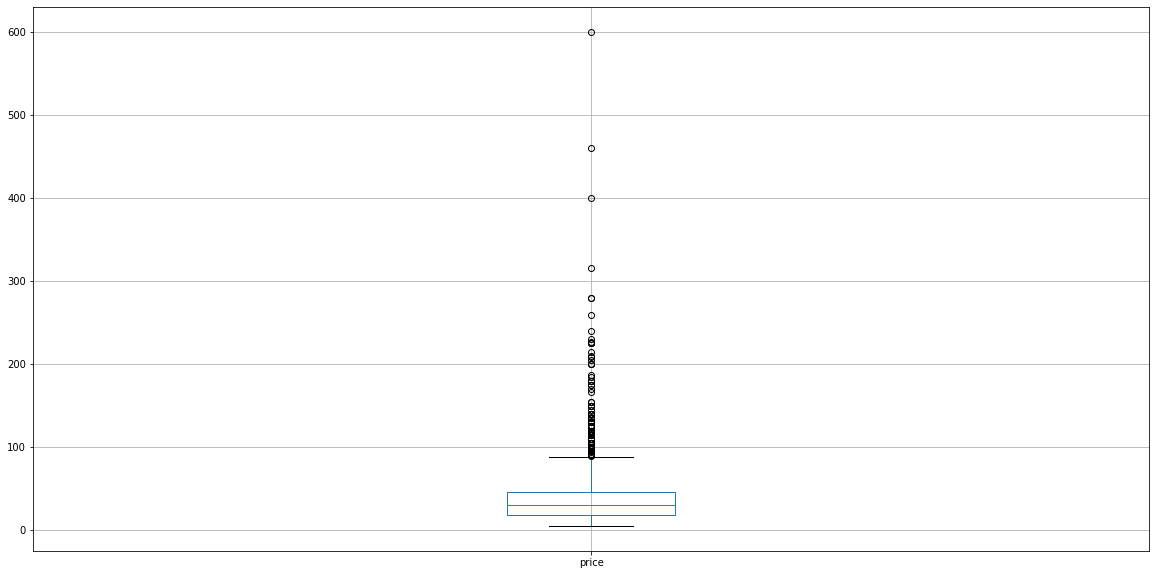

In [60]:
# Create a boxplot to compare means
sample.boxplot("price", figsize=(20, 10))

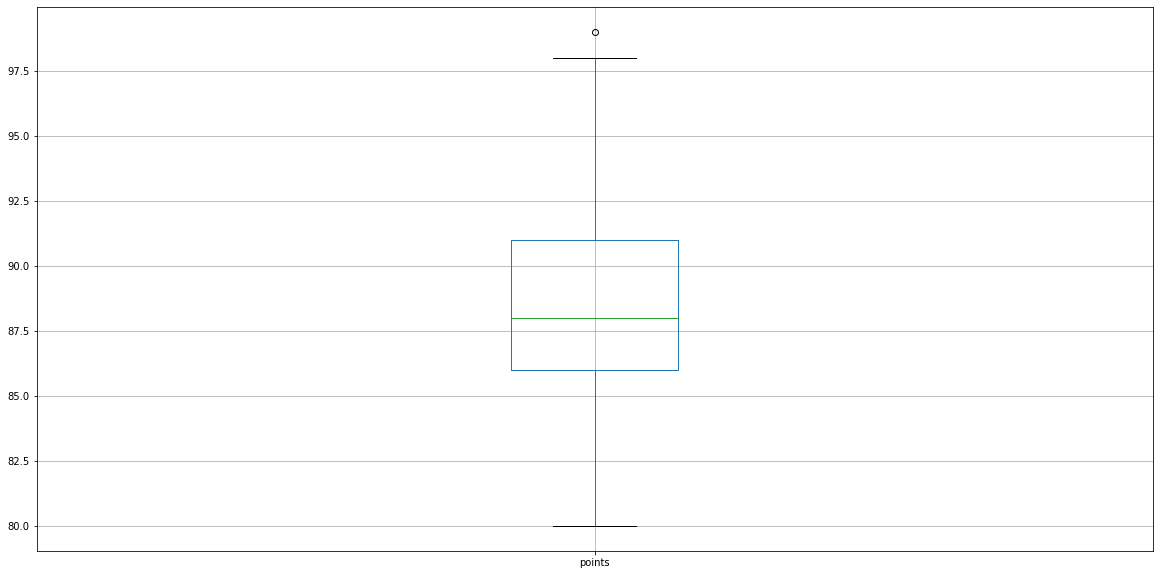

In [61]:
# Create a boxplot to compare means
sample.boxplot("points", figsize=(20, 10))

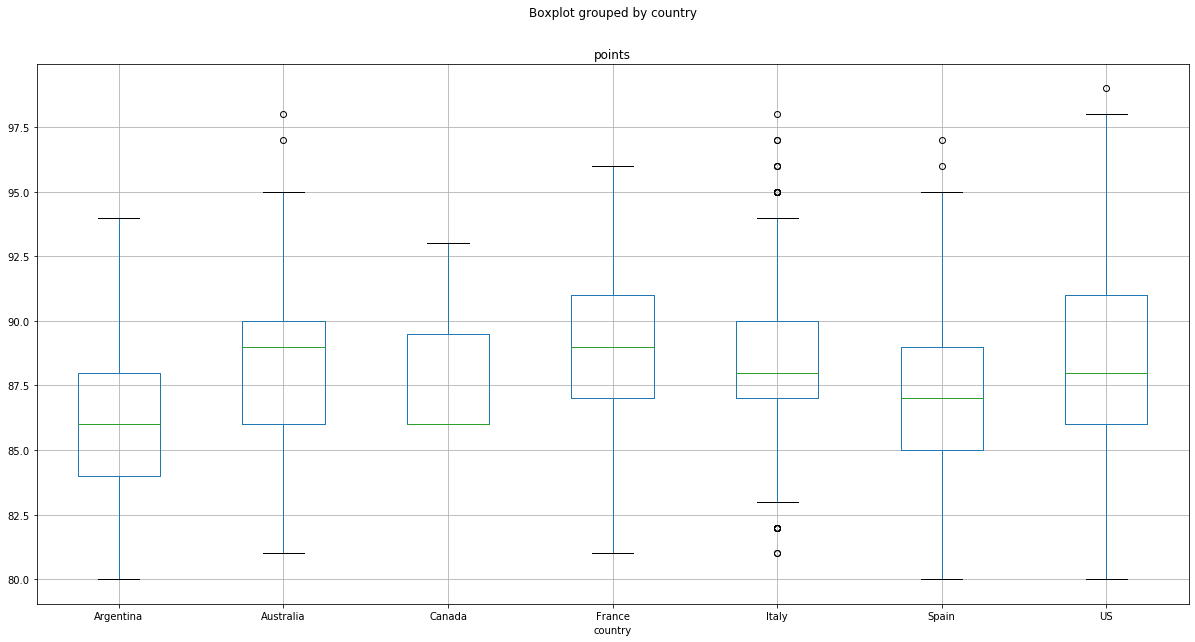

In [62]:
# Create a boxplot to compare means
sample.boxplot("points", by="country", figsize=(20, 10))

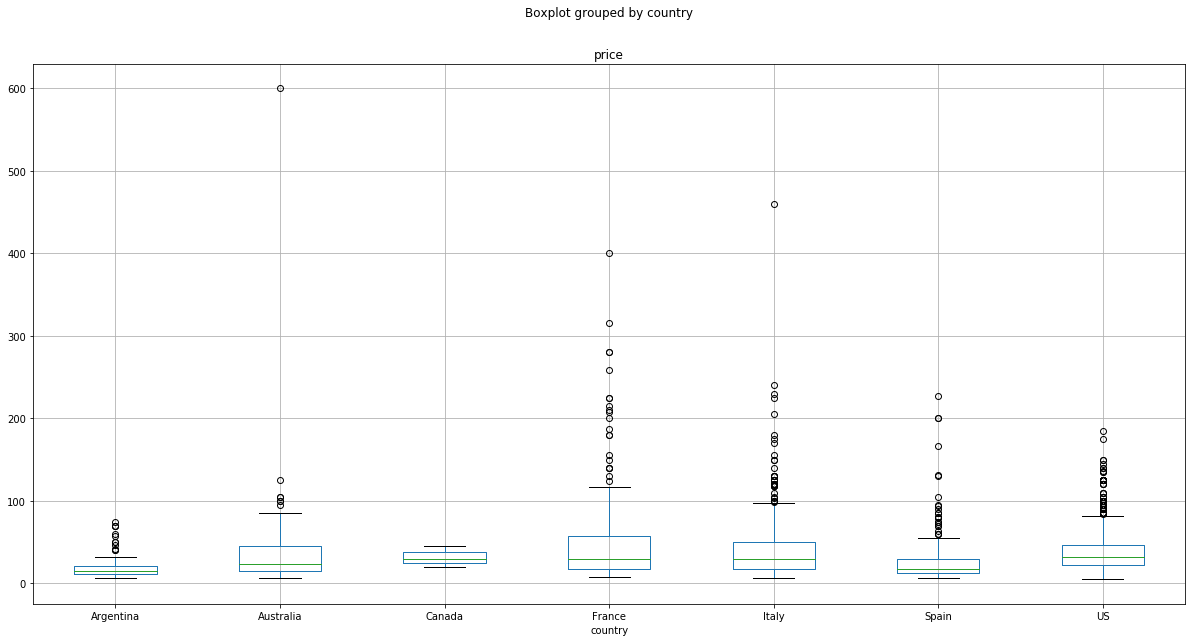

In [63]:
# Create a boxplot to compare means
sample.boxplot("price", by="country", figsize=(20, 10))

The correlation between both factors is 0.52
The r-squared is: 0.2693783122354398


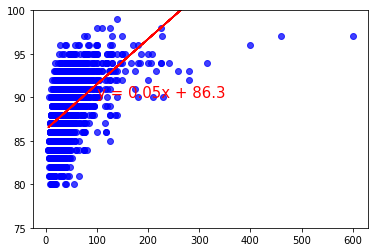

In [85]:
# Create scatter plot based uponabove values
plt.scatter(sample["price"], sample["points"], marker="o", facecolors="b", alpha=0.75, label ="Precio vs Ratings")

# Calculate correlation
correlation = round(st.pearsonr(sample["price"], sample["points"])[0],2)
print(f"The correlation between both factors is {correlation}")

# Calculate linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(sample["price"], sample["points"])
regress_values = sample["price"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.plot(sample["price"],regress_values,"r-")
plt.annotate(line_eq,(100,90), fontsize=15,color="red")
plt.ylim(75, 100)

# Print chart to screen
plt.show()

The correlation between both factors is 0.52
The r-squared is: 0.2693783122354398


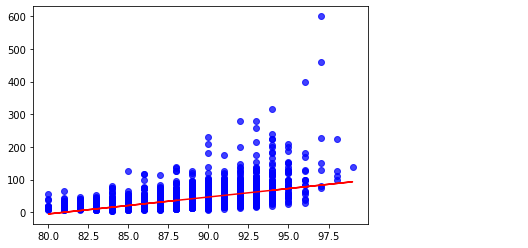

In [87]:
# Create scatter plot based uponabove values
plt.scatter(sample["points"], sample["price"], marker="o", facecolors="b", alpha=0.75, label ="Precio vs Ratings")

# Calculate correlation
correlation = round(st.pearsonr(sample["points"], sample["price"])[0],2)
print(f"The correlation between both factors is {correlation}")

# Calculate linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(sample["points"], sample["price"])
regress_values = sample["points"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.plot(sample["points"],regress_values,"r-")
plt.annotate(line_eq,(100,90), fontsize=15,color="red")
#plt.ylim(75, 100)

# Print chart to screen
plt.show()